In [1]:

import saflow
from saflow.data import load_fooof_data, load_subjlevel_fooofs, balance_data, balance_dataset
from saflow.utils import grid_topoplot
import os.path as op
from saflow.stats import subject_contrast, singlefeat_classif, mask_pvals, apply_tmax
from saflow.utils import get_meg_picks_and_info
import numpy as np
import pickle as pkl
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut, LeavePGroupsOut, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

picks, chan_info = get_meg_picks_and_info('12', '02')

alpha = 0.05
n_perms = 1
clf = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cholesky', max_iter=200))])#)])#)])xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
clf_name = 'lr'#'


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing 5 compensators from info because not all compensation channels were picked.


In [2]:
# load aper for correct at epoch-level
feature = 'fooof_fixed_correct_1022_sensor_8trials'
feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
classif = 'INOUT_2575'
trial_type_to_get = 'correct'
trial_type_formatted = trial_type_to_get#'-'.join(trial_type_to_get)



# Aperiodic
feat_to_get = 'ksor'
classif_name = f'{classif}_{feature}_{feat_to_get}_{trial_type_formatted}'
loaded_data_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(loaded_data_filename):
    feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
    X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = load_fooof_data(feature, feature_fpath, feat_to_get, trial_type_to_get, classif=classif)
    with open(loaded_data_filename, 'wb') as f:
        pkl.dump([X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic], f)
else:
    with open(loaded_data_filename, 'rb') as f:
        X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = pkl.load(f)


X_aperiodic = X_aperiodic[1:,:,:]

X_aperiodic_correct, y_aperiodic_correct, gr_aperiodic_correct = balance_dataset(X_aperiodic,y_aperiodic,groups_aperiodic)
print(f'Data shape before balance (aperiodic) : {X_aperiodic.shape} and after balance : {X_aperiodic_correct.shape}')



Group sub-04: {0: 226, 1: 105}
Group sub-05: {0: 553, 1: 286}
Group sub-06: {0: 215, 1: 154}
Group sub-07: {0: 495, 1: 434}
Group sub-08: {0: 303, 1: 270}
Group sub-09: {0: 512, 1: 214}
Group sub-10: {0: 646, 1: 458}
Group sub-11: {0: 370, 1: 337}
Group sub-12: {0: 548, 1: 427}
Group sub-13: {0: 344, 1: 140}
Group sub-14: {0: 663, 1: 451}
Group sub-15: {0: 10, 1: 2}
Group sub-17: {0: 728, 1: 392}
Group sub-18: {0: 89, 1: 93}
Group sub-20: {0: 287, 1: 206}
Group sub-21: {0: 311, 1: 146}
Group sub-22: {0: 408, 1: 260}
Group sub-23: {0: 115, 1: 77}
Group sub-24: {0: 508, 1: 396}
Group sub-26: {0: 543, 1: 454}
Group sub-28: {0: 681, 1: 594}
Group sub-29: {0: 64, 1: 28}
Group sub-30: {0: 610, 1: 464}
Group sub-31: {0: 329, 1: 226}
Group sub-32: {0: 734, 1: 626}
Group sub-33: {0: 506, 1: 259}
Group sub-34: {0: 403, 1: 336}
Group sub-35: {0: 445, 1: 270}
Group sub-36: {0: 715, 1: 582}
Group sub-37: {0: 261, 1: 158}
Group sub-38: {0: 343, 1: 275}
Data shape before balance (aperiodic) : (3, 220

In [3]:
# load aper for lapse at epoch-level
feature = 'fooof_fixed_lapse_1022_sensor_8trials'
feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
classif = 'INOUT_2575'
trial_type_to_get = 'lapse'
trial_type_formatted = trial_type_to_get#'-'.join(trial_type_to_get)



# Aperiodic
feat_to_get = 'ksor'
classif_name = f'{classif}_{feature}_{feat_to_get}_{trial_type_formatted}'
loaded_data_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(loaded_data_filename):
    feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
    X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = load_fooof_data(feature, feature_fpath, feat_to_get, trial_type_to_get, classif=classif)
    with open(loaded_data_filename, 'wb') as f:
        pkl.dump([X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic], f)
else:
    with open(loaded_data_filename, 'rb') as f:
        X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = pkl.load(f)


X_aperiodic = X_aperiodic[1:,:,:]

X_aperiodic_lapse, y_aperiodic_lapse, gr_aperiodic_lapse = balance_dataset(X_aperiodic,y_aperiodic,groups_aperiodic)
print(f'Data shape before balance (aperiodic) : {X_aperiodic.shape} and after balance : {X_aperiodic_lapse.shape}')

Group sub-04: {0: 12, 1: 202}
Group sub-05: {0: 25, 1: 45}
Group sub-06: {0: 7, 1: 51}
Group sub-07: {0: 88, 1: 106}
Group sub-08: {0: 2, 1: 5}
Group sub-09: {0: 41, 1: 122}
Group sub-10: {0: 12, 1: 98}
Group sub-11: {0: 11, 1: 44}
Group sub-12: {0: 7, 1: 60}
Group sub-13: {0: 11, 1: 27}
Group sub-14: {0: 13, 1: 93}
Group sub-15: {0: 2, 1: 5}
Group sub-17: {0: 29, 1: 155}
Group sub-18: {0: 5, 1: 12}
Group sub-20: {0: 37, 1: 87}
Group sub-21: {0: 99, 1: 184}
Group sub-23: {0: 10, 1: 16}
Group sub-24: {0: 22, 1: 67}
Group sub-26: {0: 86, 1: 126}
Group sub-28: {0: 68, 1: 147}
Group sub-30: {0: 133, 1: 280}
Group sub-31: {0: 112, 1: 207}
Group sub-32: {0: 9, 1: 34}
Group sub-33: {0: 38, 1: 207}
Group sub-34: {0: 41, 1: 119}
Group sub-35: {0: 40, 1: 176}
Group sub-36: {0: 54, 1: 196}
Group sub-37: {0: 12, 1: 53}
Group sub-38: {0: 19, 1: 44}
Data shape before balance (aperiodic) : (3, 4013, 270) and after balance : (3, 2090, 270)


In [4]:
X_aperiodic_lapse.shape

(3, 2090, 270)

(3, 18232, 270)

# slope correction on single-epochs

In [6]:
feature = 'fooof_fixed_alltrials_1022_sensor_8trials_selfcorr'
feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
classif = 'INOUT_2575'
trial_type_to_get = 'alltrials'
trial_type_formatted = trial_type_to_get#'-'.join(trial_type_to_get)


clf = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cholesky', max_iter=200))])#)])#)])xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
clf_name = 'lr'#'

alpha = 0.01
n_perms = 1


# Load trial-level data
# Raw PSD
feat_to_get = 'psd_raw'
classif_name = f'{classif}_{feature}_{feat_to_get}_{trial_type_formatted}'
loaded_data_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(loaded_data_filename):
    feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
    X_raw, y_raw, groups_raw, VTC_raw, task_raw = load_fooof_data(feature, feature_fpath, feat_to_get, trial_type_to_get, classif=classif)
    with open(loaded_data_filename, 'wb') as f:
        pkl.dump([X_raw, y_raw, groups_raw, VTC_raw, task_raw], f)
else:
    with open(loaded_data_filename, 'rb') as f:
        X_raw, y_raw, groups_raw, VTC_raw, task_raw = pkl.load(f)
# Corrected PSD
feat_to_get = 'psd_corrected'
classif_name = f'{classif}_{feature}_{feat_to_get}_{trial_type_formatted}'
loaded_data_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(loaded_data_filename):
    feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
    X_corrected, y_corrected, groups_corrected, VTC_corrected, task_corrected = load_fooof_data(feature, feature_fpath, feat_to_get, trial_type_to_get, classif=classif)
    with open(loaded_data_filename, 'wb') as f:
        pkl.dump([X_corrected, y_corrected, groups_corrected, VTC_corrected, task_corrected], f)
else:
    with open(loaded_data_filename, 'rb') as f:
        X_corrected, y_corrected, groups_corrected, VTC_corrected, task_corrected = pkl.load(f)
# Aperiodic
feat_to_get = 'ksor'
classif_name = f'{classif}_{feature}_{feat_to_get}_{trial_type_formatted}'
loaded_data_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(loaded_data_filename):
    feature_fpath = op.join(saflow.BIDS_PATH, 'derivatives', feature)
    X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = load_fooof_data(feature, feature_fpath, feat_to_get, trial_type_to_get, classif=classif)
    with open(loaded_data_filename, 'wb') as f:
        pkl.dump([X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic], f)
else:
    with open(loaded_data_filename, 'rb') as f:
        X_aperiodic, y_aperiodic, groups_aperiodic, VTC_aperiodic, task_aperiodic = pkl.load(f)



X_raw = X_raw[1:,:,:]
X_corrected = X_corrected[1:,:,:]
X_aperiodic = X_aperiodic[1:,:,:]

X_raw_bal, y_raw_bal, gr_raw_bal = balance_dataset(X_raw,y_raw,groups_raw)
print(f'Data shape before balance (raw) : {X_raw.shape} and after balance : {X_raw_bal.shape}')
X_corrected_bal, y_corrected_bal, gr_corrected_bal = balance_dataset(X_corrected,y_corrected,groups_corrected)
print(f'Data shape before balance (corrected) : {X_corrected.shape} and after balance : {X_corrected_bal.shape}')
X_aperiodic_bal, y_aperiodic_bal, gr_aperiodic_bal = balance_dataset(X_aperiodic,y_aperiodic,groups_aperiodic)
print(f'Data shape before balance (aperiodic) : {X_aperiodic.shape} and after balance : {X_aperiodic_bal.shape}')



# Compute contrasts
raw_contrast, raw_tvals, raw_pvals = subject_contrast(X_raw_bal, y_raw_bal)
corrected_contrast, corrected_tvals, corrected_pvals = subject_contrast(X_corrected_bal, y_corrected_bal)
aperiodic_contrast, aperiodic_tvals, aperiodic_pvals = subject_contrast(X_aperiodic_bal, y_aperiodic_bal)

# Classif PSD
classif_name = f'{clf_name}_{classif}_{feature}_raw_{trial_type_formatted}_{n_perms}perms'
output_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(output_filename):
    raw_results = singlefeat_classif(X_raw_bal, y_raw_bal, gr_raw_bal, clf, LeaveOneGroupOut(), n_perms=n_perms)
    with open(output_filename, 'wb') as f:
        pkl.dump(raw_results, f)
else:
    with open(output_filename, 'rb') as f:
        raw_results = pkl.load(f)

# Classif PSD corrected
classif_name = f'{clf_name}_{classif}_{feature}_corrected_{trial_type_formatted}_{n_perms}perms'
output_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(output_filename):
    corrected_results = singlefeat_classif(X_corrected_bal, y_corrected_bal, gr_corrected_bal, clf, LeaveOneGroupOut(), n_perms=n_perms)
    with open(output_filename, 'wb') as f:
        pkl.dump(corrected_results, f)
else:
    with open(output_filename, 'rb') as f:
        corrected_results = pkl.load(f)

# Classif Aperiodic
classif_name = f'{clf_name}_{classif}_{feature}_aperiodic_{trial_type_formatted}_{n_perms}perms'
output_filename = f'../tmp/{classif_name}.pkl'
if not op.exists(output_filename):
    aperiodic_results = singlefeat_classif(X_aperiodic_bal, y_aperiodic_bal, gr_aperiodic_bal, clf, LeaveOneGroupOut(), n_perms=n_perms)
    with open(output_filename, 'wb') as f:
        pkl.dump(aperiodic_results, f)
else:
    with open(output_filename, 'rb') as f:
        aperiodic_results = pkl.load(f)






Group sub-04: {0: 239, 1: 323}
Group sub-05: {0: 597, 1: 476}
Group sub-06: {0: 222, 1: 246}
Group sub-07: {0: 597, 1: 593}
Group sub-08: {0: 305, 1: 320}
Group sub-09: {0: 570, 1: 404}
Group sub-10: {0: 799, 1: 751}
Group sub-11: {0: 405, 1: 383}
Group sub-12: {0: 573, 1: 552}
Group sub-13: {0: 435, 1: 373}
Group sub-14: {0: 722, 1: 673}
Group sub-15: {0: 34, 1: 12}
Group sub-17: {0: 792, 1: 805}
Group sub-18: {0: 94, 1: 115}
Group sub-19: {0: 232, 1: 281}
Group sub-20: {0: 348, 1: 409}
Group sub-21: {0: 694, 1: 630}
Group sub-22: {0: 441, 1: 433}
Group sub-23: {0: 159, 1: 120}
Group sub-24: {0: 530, 1: 477}
Group sub-26: {0: 629, 1: 633}
Group sub-28: {0: 773, 1: 776}
Group sub-29: {0: 66, 1: 61}
Group sub-30: {0: 774, 1: 783}
Group sub-31: {0: 521, 1: 561}
Group sub-32: {0: 743, 1: 688}
Group sub-33: {0: 582, 1: 607}
Group sub-34: {0: 462, 1: 458}
Group sub-35: {0: 518, 1: 509}
Group sub-36: {0: 770, 1: 785}
Group sub-37: {0: 290, 1: 280}
Group sub-38: {0: 362, 1: 342}
Data shape be

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alpha_PSD vs. Alpha_PSD corrected: t-test paired samples, P_val:1.679e-02 t=-2.406e+00
Theta_PSD vs. Theta_PSD corrected: t-test paired samples, P_val:2.225e-01 t=1.223e+00
Low Beta_PSD vs. Low Beta_PSD corrected: t-test paired samples, P_val:1.607e-04 t=-3.828e+00
High Beta_PSD vs. High Beta_PSD corrected: t-test paired samples, P_val:1.272e-10 t=-6.692e+00
Gamma 1_PSD vs. Gamma 1_PSD corrected: t-test paired samples, P_val:3.457e-14 t=8.011e+00
Gamma 2_PSD vs. Gamma 2_PSD corrected: t-test paired samples, P_val:5.872e-32 t=1.347e+01
Gamma 3_PSD vs. Gamma 3_PSD corrected: t-test paired samples, P_val:2.030e-33 t=1.389e+01
(3780,)


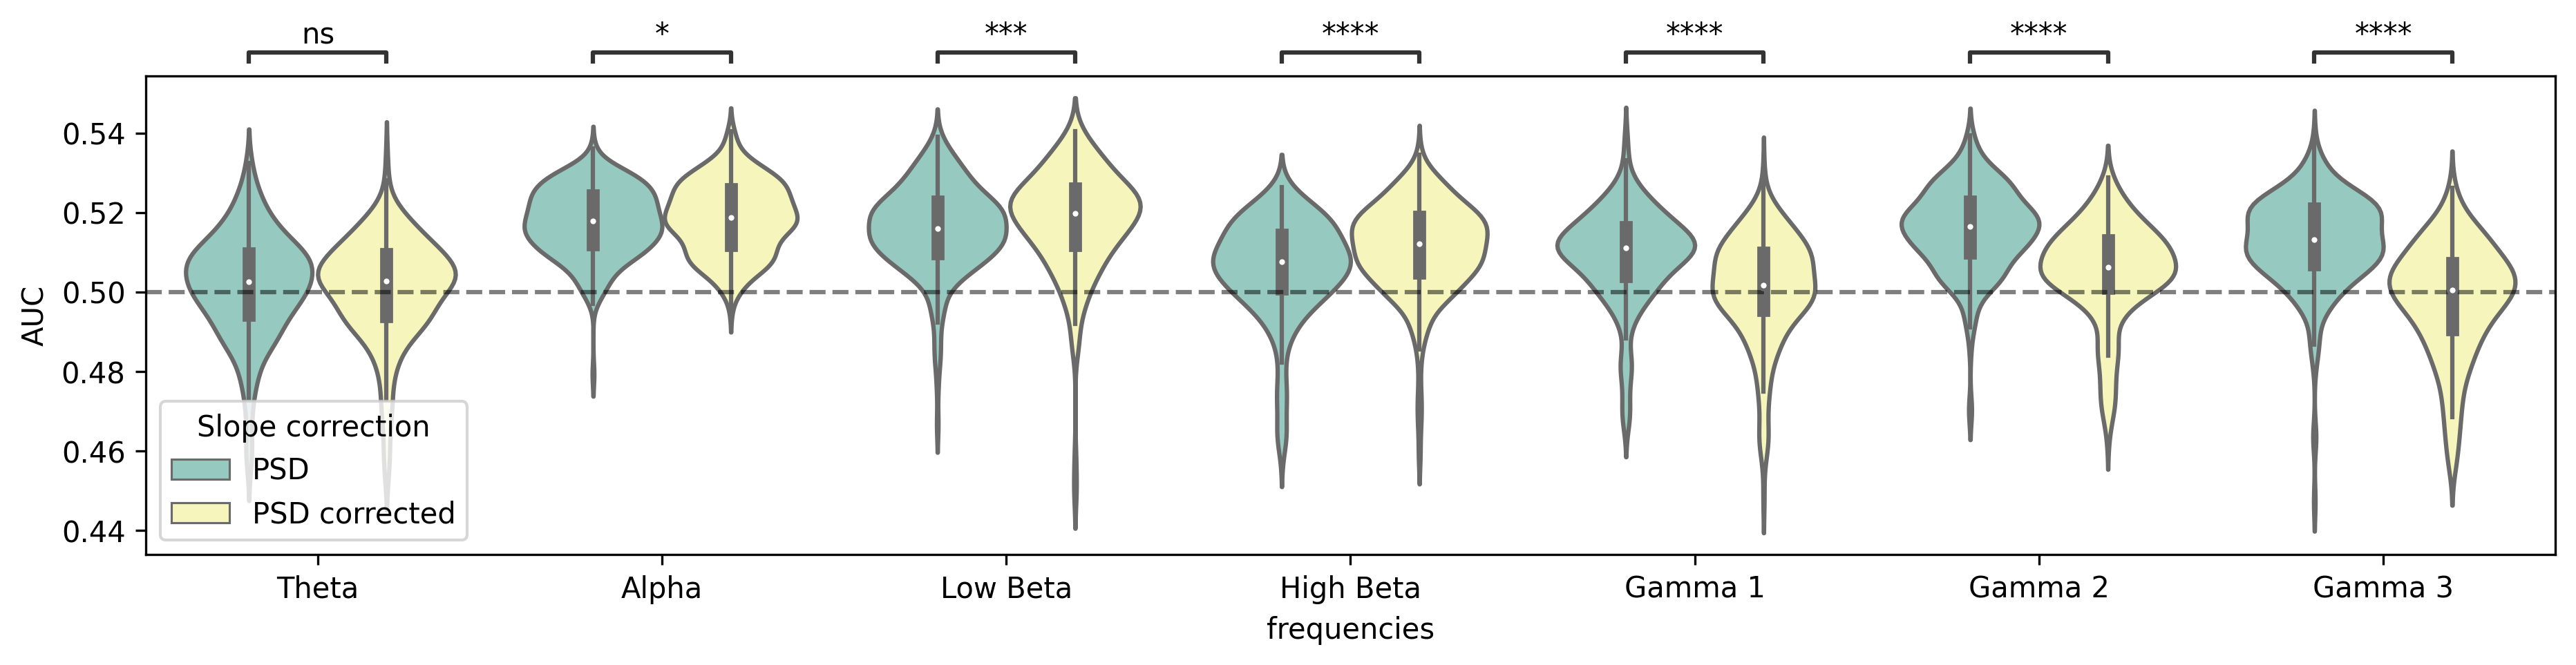

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

freq_names = ['Theta', 'Alpha', 'Low Beta', 'High Beta', 'Gamma 1', 'Gamma 2', 'Gamma 3']
freq_mat = np.array([[x]*270 for x in freq_names]).flatten()
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)

scores = np.array([raw_results['scores'].flatten()] + [corrected_results['scores'].flatten()]).flatten()
frequencies = np.array([freq_mat] + [freq_mat]).flatten()
psd_type = np.array([['PSD']*270*7] + [['PSD corrected']*270*7]).flatten()
plot_df = pd.DataFrame({'AUC': scores, 'frequencies': frequencies, 'Slope correction': psd_type})
sns.violinplot(x='frequencies', y='AUC', hue='Slope correction', data=plot_df, ax=ax, palette='Set3')

# Add paired t-test annotations
pairs = [((freq, "PSD"), (freq, "PSD corrected")) for freq in freq_names]
annotator = Annotator(ax, pairs, data=plot_df, x='frequencies', y='AUC', hue='Slope correction')
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
annotator.apply_and_annotate()

# add a dashed line at y = 0.5
ax.axhline(0.5, ls='--', color='k', alpha=0.5)

print(scores.shape)

['delta', 'theta', 'alpha', 'lobeta', 'hibeta', 'gamma1', 'gamma2', 'gamma3']